# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pylab as py

from linearmodels.iv import IV2SLS

from scipy.stats import zscore
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read Data

In [2]:
df = pd.read_csv("./data.csv")

In [3]:
df.head()

,WILAYAH,Persentase_Penduduk_Miskin,Tingkat_Pengangguran_Terbuka,Jumlah_Penduduk,IPM
0,Simeulue,18.49,5.47,95304,66.03
1,Aceh Singkil,20.20,8.24,123842,68.94
2,Aceh Selatan,12.87,6.54,242196,67.12
3,Aceh Tenggara,13.21,5.72,216264,69.37
4,Aceh Timur,14.08,7.26,436086,67.63


In [4]:
df.columns

Index(['WILAYAH', 'Persentase_Penduduk_Miskin', 'Tingkat_Pengangguran_Terbuka',
       'Jumlah_Penduduk', 'IPM'],
      dtype='object')

In [5]:
col_rename = {
    "WILAYAH": "provinsi",
    "Jumlah_Penduduk": "jumlah_penduduk",
    "Tingkat_Pengangguran_Terbuka": "tingkat_pengangguran",
    "Persentase_Penduduk_Miskin": "persentase_miskin",
    "IPM": "ipm"
}

df = df.rename(columns=col_rename)

In [6]:
df

,provinsi,persentase_miskin,tingkat_pengangguran,jumlah_penduduk,ipm
0,Simeulue,18.49,5.47,95304,66.03
1,Aceh Singkil,20.20,8.24,123842,68.94
2,Aceh Selatan,12.87,6.54,242196,67.12
3,Aceh Tenggara,13.21,5.72,216264,69.37
4,Aceh Timur,14.08,7.26,436086,67.63
...,...,...,...,...,...
373,Tambrauw,32.80,2.46,14021,53.45
374,Maybrat,30.78,2.26,41798,59.52
375,Manokwari Selatan,28.88,2.43,24679,59.84
376,Pegunungan Arfak,33.81,1.62,31793,56.33


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   provinsi              378 non-null    object 
 1   persentase_miskin     378 non-null    float64
 2   tingkat_pengangguran  378 non-null    float64
 3   jumlah_penduduk       378 non-null    object 
 4   ipm                   378 non-null    float64
dtypes: float64(3), object(2)
memory usage: 14.9+ KB


In [8]:
df['jumlah_penduduk'] = df['jumlah_penduduk'].str.replace(' ', '')
df['jumlah_penduduk'] = df['jumlah_penduduk'].str.replace('.', '')

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/1973748376.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['jumlah_penduduk'] = df['jumlah_penduduk'].str.replace('.', '')


In [9]:
df['jumlah_penduduk'] = df['jumlah_penduduk'].astype('int')

# Statistik Deskriptif

In [10]:
df.describe()

,persentase_miskin,tingkat_pengangguran,jumlah_penduduk,ipm
count,378.000000,378.000000,3.780000e+02,378.000000
mean,10.816243,5.853333,6.152807e+05,70.686878
std,6.183999,2.743243,7.222254e+05,5.478047
min,2.020000,0.840000,1.402100e+04,53.450000
25%,6.292500,3.877500,1.674730e+05,67.022500
50%,9.430000,5.190000,3.171225e+05,69.935000
75%,13.620000,7.465000,8.498388e+05,73.532500
max,34.490000,14.290000,6.088233e+06,86.610000


### Deteksi Outlier

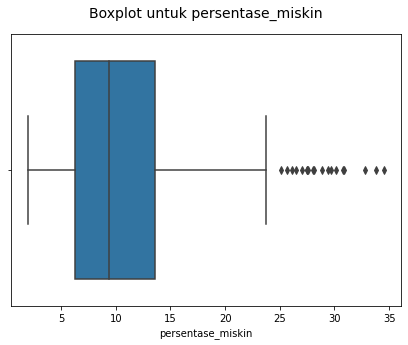

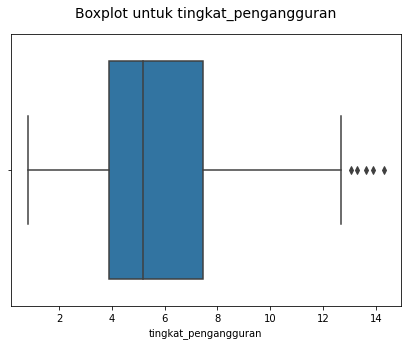

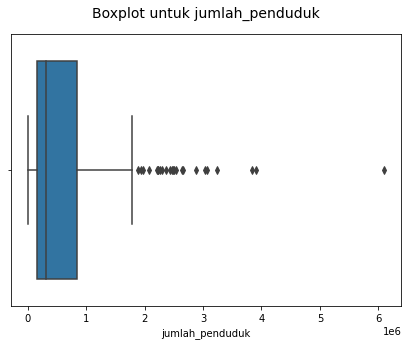

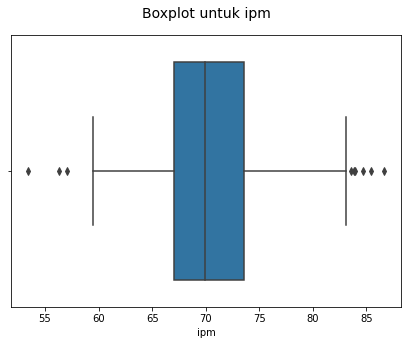

In [11]:
for col in df.columns[1:]:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot untuk {col}', fontsize=14, y=1.04)
    plt.xlabel(col)
    plt.show()

Data yang telah diperoleh memiliki banyak outliers (dapat dilihat dari boxplot yang sudah dibuat diatas)

### Membersihkan Outlier

In [12]:
z_scores = zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
filtered = (abs_z_scores < 3).all(axis=1)
df = df[filtered]

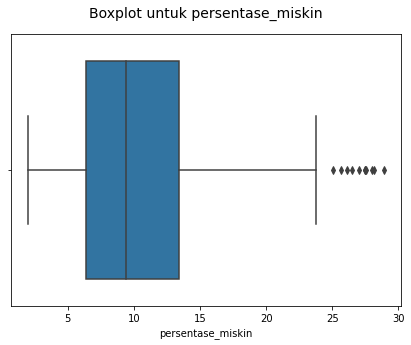

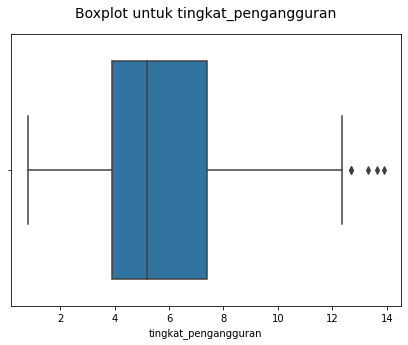

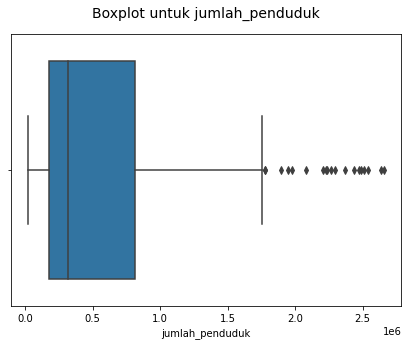

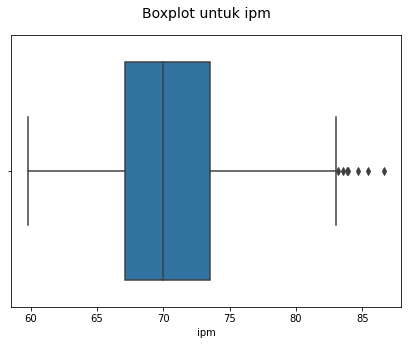

In [13]:
for col in df.columns[1:]:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot untuk {col}', fontsize=14, y=1.04)
    plt.xlabel(col)
    plt.show()

In [14]:
df.describe()

,persentase_miskin,tingkat_pengangguran,jumlah_penduduk,ipm
count,363.000000,363.000000,3.630000e+02,363.000000
mean,10.460937,5.799972,5.672232e+05,70.816364
std,5.441957,2.656223,5.719804e+05,5.209731
min,2.020000,0.840000,2.467900e+04,59.840000
25%,6.360000,3.900000,1.766145e+05,67.115000
50%,9.370000,5.190000,3.171810e+05,69.950000
75%,13.435000,7.395000,8.148560e+05,73.505000
max,28.880000,13.880000,2.654448e+06,86.610000


# Uji

### Uji Hausman

In [15]:
x = sm.add_constant(df[["jumlah_penduduk", "ipm"]])
y = df["persentase_miskin"]
model = sm.OLS(y,x).fit()
y_pred = model.predict()
resid = y - y_pred

In [16]:
pred_df = pd.DataFrame({"prediction":y_pred,"residual":resid})
pred_df.head()

,prediction,residual
0,13.230052,5.259948
1,11.533324,8.666676
2,12.601450,0.268550
3,11.287100,1.922900
4,12.313713,1.766287


In [17]:
x1 = sm.add_constant(pred_df)
y1 = df["tingkat_pengangguran"]
model_1 = sm.OLS(y1,x1).fit()
print(model_1.summary())

                             OLS Regression Results                             
Dep. Variable:     tingkat_pengangguran   R-squared:                       0.280
Model:                              OLS   Adj. R-squared:                  0.276
Method:                   Least Squares   F-statistic:                     70.10
Date:                  Mon, 10 Jan 2022   Prob (F-statistic):           1.94e-26
Time:                          20:48:47   Log-Likelihood:                -809.49
No. Observations:                   363   AIC:                             1625.
Df Residuals:                       360   BIC:                             1637.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.6443      0.426

**Simultaneous Significance Testing**  

Uji hipotesis dari Prob(F-statistics):  
$H_{0}$ : Semua variabel bebas tidak memiliki pengaruh timbal balik terhadap variabel bebas lainnya dalam model.  
$H_{1}$ : Semua variabel independen secara simultan mempengaruhi variabel dependen.

Prob(F-Statistics) yang kami dapatkan dari model tersebut adalah 0.000128. Prob(F-Statistics) ini lebih rendah dari 0.05 dan ini berarti kami menolak $H_{0}$. Ini juga berarti bahwa semua variabel independen secara simultan mempengaruhi variabel indepen.

#

### Uji Identifikasi

In [18]:
K, k, m = 2, 1, 2

if (K - k == m - 1):
    print('Identified')
elif (K - k >= m - 1):
    print('Overidentified')
elif (K - k <= m - 1):
    print('Underidentified')
else:
    print('Wrong')

Identified


Karena kedua persamaan yang kami gunakan memiliki jumlah K, k dan m yang sama, maka uji identifikasi diatas akan menghasilkan hasil yang sama ya itu "Identified".

**Kondisi Order**

In [19]:
Const = 'alpha_0', 'alpha_2'
Y1 = 1, 'alpha_3'
Y2 = 'alpha_1', 1
X1 = 'beta_0', 0
X2 = 0, 'beta_1'
mat = pd.DataFrame({'Const':Const,'Y1':Y1,'Y2':Y2,'X1':X1,'X2':X2},index=['Persentase Kemiskinan','Tingkat Pengangguran'])
mat

,Const,Y1,Y2,X1,X2
Persentase Kemiskinan,alpha_0,1,alpha_1,beta_0,0
Tingkat Pengangguran,alpha_2,alpha_3,1,0,beta_1


# Estimasi Parameter Model

In [20]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=21, shuffle=False)

In [21]:
formula_1 ='(persentase_miskin) ~ 1 + (ipm) + [(tingkat_pengangguran) ~ (jumlah_penduduk)]'

model_1 = IV2SLS.from_formula(formula_1, train_df).fit()
print(model_1)

                          IV-2SLS Estimation Summary                          
Dep. Variable:      persentase_miskin   R-squared:                      0.2835
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2785
No. Observations:                 290   F-statistic:                    108.75
Date:                Mon, Jan 10 2022   P-value (F-stat)                0.0000
Time:                        20:48:47   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept                51.248     4.5246     11.326     0.0000      42.380      60.116
ipm         

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{1} = 51.248 - 0.5851X_{1} + 0.1005Y_{2} + u_{i} $$

In [22]:
formula_2 = 'tingkat_pengangguran ~ 1 + jumlah_penduduk + [(persentase_miskin) ~ ipm ]'

model_2 = IV2SLS.from_formula(formula_2, train_df).fit()
print(model_2)

                           IV-2SLS Estimation Summary                           
Dep. Variable:     tingkat_pengangguran   R-squared:                     -0.0671
Estimator:                      IV-2SLS   Adj. R-squared:                -0.0746
No. Observations:                   290   F-statistic:                    115.17
Date:                  Mon, Jan 10 2022   P-value (F-stat)                0.0000
Time:                          20:48:47   Distribution:                  chi2(2)
Cov. Estimator:                  robust                                         
                                                                                
                                 Parameter Estimates                                 
                   Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------------
Intercept             9.0919     0.6248     14.551     0.0000      7.8673      10.316
jumlah_p

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{2} = 9.0919 + 1.654e^{-06}X_{2} - 0.4078Y_{1} + u_{i} $$

# Classic Assumption

### 1. Uji Multikolinearitas

Kami menguji multikolinearitas menggunakan VIF

In [23]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
    return vif

In [24]:
X = df[['tingkat_pengangguran', 'ipm']]
calc_vif(X)

,Variables,VIF
0,tingkat_pengangguran,6.768991
1,ipm,6.768991


In [25]:
X = df[['persentase_miskin', 'jumlah_penduduk']]
calc_vif(X)

,Variables,VIF
0,persentase_miskin,1.54784
1,jumlah_penduduk,1.54784


Karena semua nilai VIF yang telah diuji itu dibawah 10, maka tidak terdapat multikolinearitas pada data kami.

### 2. Uji Heteroskedastisitas

In [26]:
df['persentase_miskin_pred'] = model_1.predict(data = train_df)
df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/3754405617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['persentase_miskin_pred'] = model_1.predict(data = train_df)
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/3754405617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)


In [27]:
df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/4165422805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/4165422805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']


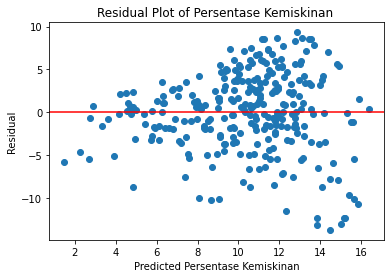

In [28]:
plt.scatter(df['persentase_miskin_pred'], df['persentase_miskin_pred'] - train_df['persentase_miskin'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Persentase Kemiskinan ')
plt.xlabel('Predicted Persentase Kemiskinan')
plt.ylabel('Residual')
plt.show()

In [29]:
model_fit = smf.ols('persentase_miskin ~ 1 + ipm ', data = train_df).fit()

# Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 34.13259602706333),
 ('p-value', 5.148162725380334e-09),
 ('f-value', 38.419069811776374),
 ('f p-value', 1.9712442166523584e-09)]

Karena p-value (0.119066095) > alpha (0.05), maka dari itu kami dapat menyimpulkan bahwa data 'Persentase Kemiskinan' itu **Heteroskedastic**.

Text(0, 0.5, 'Residual')

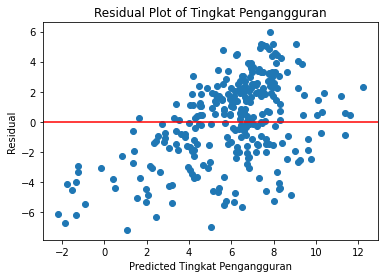

In [30]:
plt.scatter(df['tingkat_pengangguran_pred'], df['tingkat_pengangguran_pred'] - train_df['tingkat_pengangguran'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Tingkat Pengangguran')
plt.xlabel('Predicted Tingkat Pengangguran')
plt.ylabel('Residual')

In [31]:
model_fit = smf.ols('tingkat_pengangguran ~ 1 + jumlah_penduduk', data = train_df).fit()

#perform Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 0.2201979363767015),
 ('p-value', 0.6388891421665951),
 ('f-value', 0.21884550001371295),
 ('f p-value', 0.6402747992694559)]

Karena p-value (0.119066095) > alpha (0.05), maka dari itu kami dapat menyimpulkan bahwa data 'Tingkat Pengangguran' itu **Heteroskedastik**.  

Dari kedua tes heteroskedastik diatas, maka dapat disimpulkan bahwa kedua variabel memiliki data yang **Heteroskedastik**. Maka data tersebut harus dilakukan transformasi.

**Data Transformation**

Untuk transformasi data, kami melakukan log transformasi pada variabel dependen.

In [57]:
df['persentase_miskin_log'] = np.log(df['persentase_miskin'])
df['tingkat_pengangguran_log'] = np.log(df['tingkat_pengangguran'])

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/1457969480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['persentase_miskin_log'] = np.log(df['persentase_miskin'])
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/1457969480.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tingkat_pengangguran_log'] = np.log(df['tingkat_pengangguran'])


In [33]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=21, shuffle=False)

In [34]:
formula_1 ='(persentase_miskin_log) ~ 1 + (ipm) + [(tingkat_pengangguran_log) ~ (jumlah_penduduk)]'

model_1 = IV2SLS.from_formula(formula_1, train_df).fit()
print(model_1)

                            IV-2SLS Estimation Summary                           
Dep. Variable:     persentase_miskin_log   R-squared:                      0.2420
Estimator:                       IV-2SLS   Adj. R-squared:                 0.2367
No. Observations:                    290   F-statistic:                    111.18
Date:                   Mon, Jan 10 2022   P-value (F-stat)                0.0000
Time:                           20:48:47   Distribution:                  chi2(2)
Cov. Estimator:                   robust                                         
                                                                                 
                                    Parameter Estimates                                     
                          Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------------------
Intercept                    6.4003     0.4232     15.125     0.0

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{1} = 6.4003 - 0.0648X_{1} + 0.2322Y_{2} + u_{i} $$

In [35]:
formula_2 = 'tingkat_pengangguran_log ~ 1 + jumlah_penduduk + [(persentase_miskin_log) ~ ipm ]'

model_2 = IV2SLS.from_formula(formula_2, train_df).fit()
print(model_2)

                             IV-2SLS Estimation Summary                             
Dep. Variable:     tingkat_pengangguran_log   R-squared:                     -0.0667
Estimator:                          IV-2SLS   Adj. R-squared:                -0.0741
No. Observations:                       290   F-statistic:                    108.36
Date:                      Mon, Jan 10 2022   P-value (F-stat)                0.0000
Time:                              20:48:48   Distribution:                  chi2(2)
Cov. Estimator:                      robust                                         
                                                                                    
                                   Parameter Estimates                                   
                       Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------------
Intercept                 2.9919     0.2000     14

Dari modelling diatas, kami mendapatkan persamaan sebagai berikut:  
$$ Y_{2} = 2.9919 + 3.042e^{-07}X_{2} - 0.6887Y_{1} + u_{i} $$

In [36]:
df['persentase_miskin_pred'] = model_1.predict(data = train_df)
df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/3754405617.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['persentase_miskin_pred'] = model_1.predict(data = train_df)
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/3754405617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tingkat_pengangguran_pred'] = model_2.predict(data = train_df)


In [37]:
df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']

/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/4165422805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_1'] = df['persentase_miskin'] - df['persentase_miskin_pred']
/var/folders/p7/qbt3zp_s3l592bdjy_czg2qm0000gn/T/ipykernel_32271/4165422805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resid_2'] = df['tingkat_pengangguran'] - df['tingkat_pengangguran_pred']


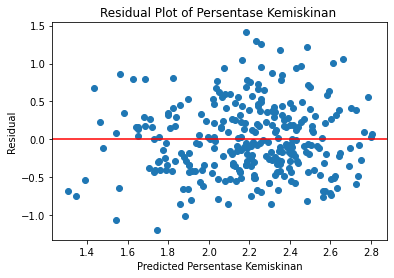

In [38]:
plt.scatter(df['persentase_miskin_pred'], df['persentase_miskin_pred'] - train_df['persentase_miskin_log'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Persentase Kemiskinan ')
plt.xlabel('Predicted Persentase Kemiskinan')
plt.ylabel('Residual')
plt.show()

In [39]:
model_fit = smf.ols('persentase_miskin_log ~ 1 + ipm ', data = train_df).fit()

# Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 0.28612235684354004),
 ('p-value', 0.5927161984963443),
 ('f-value', 0.2844297257739245),
 ('f p-value', 0.5942237286397629)]

Text(0, 0.5, 'Residual')

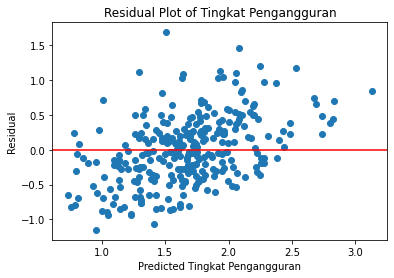

In [40]:
plt.scatter(df['tingkat_pengangguran_pred'], df['tingkat_pengangguran_pred'] - train_df['tingkat_pengangguran_log'])
plt.axhline(0, color='r')
plt.title('Residual Plot of Tingkat Pengangguran')
plt.xlabel('Predicted Tingkat Pengangguran')
plt.ylabel('Residual')

In [41]:
model_fit = smf.ols('tingkat_pengangguran_log ~ 1 + jumlah_penduduk', data = train_df).fit()

#perform Breusch-Pagan test
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model_fit.resid, model_fit.model.exog)

lzip(labels, test)

[('Lagrange multiplier statistic', 7.698698329221606),
 ('p-value', 0.005526066294021866),
 ('f-value', 7.854108733092427),
 ('f p-value', 0.005414526267499813)]

### 3. Uji Normalitas

**Residual 1**

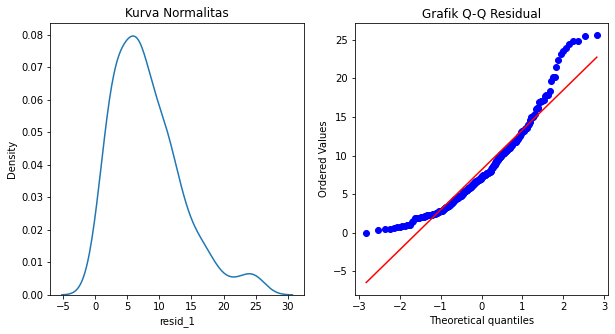

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['resid_1'])
plt.subplot(1, 2, 2)
stats.probplot(df['resid_1'].dropna(),plot=py)
plt.title('Grafik Q-Q Residual')
plt.show()

**Residual 2**

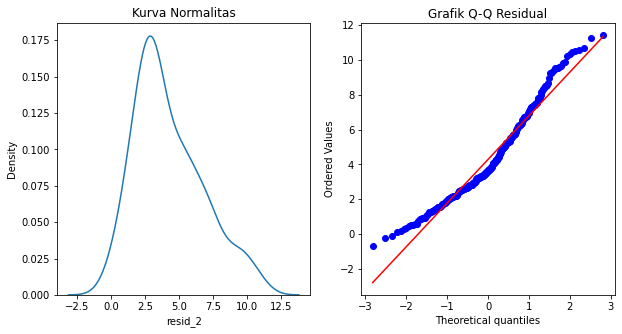

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.kdeplot(df['resid_2'])
plt.title('Kurva Normalitas')
plt.subplot(1,2,2)
stats.probplot(df['resid_2'].dropna(),plot=py)
plt.title('Grafik Q-Q Residual')
plt.show()

In [44]:
df['resid_2'].describe()

count    290.000000
mean       4.284237
std        2.538037
min       -0.669981
25%        2.500355
50%        3.659816
75%        5.824574
max       11.391933
Name: resid_2, dtype: float64

**Tingkat Pengangguran**

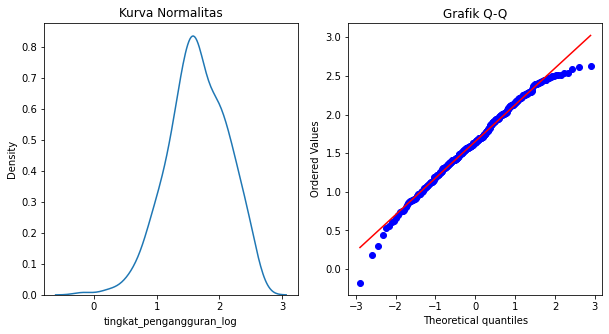

In [58]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['tingkat_pengangguran_log'])
plt.subplot(1,2,2)
stats.probplot(df['tingkat_pengangguran_log'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Jumlah Penduduk**

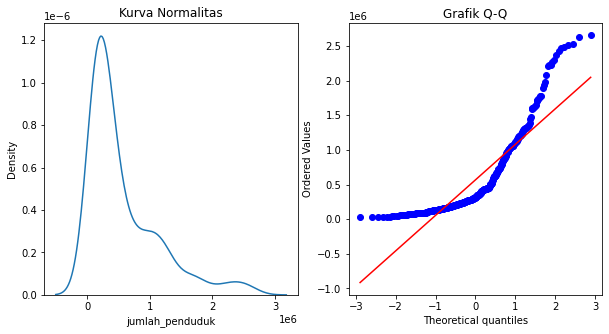

In [46]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['jumlah_penduduk'])
plt.subplot(1,2,2)
stats.probplot(df['jumlah_penduduk'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Persentase Kemiskinan**

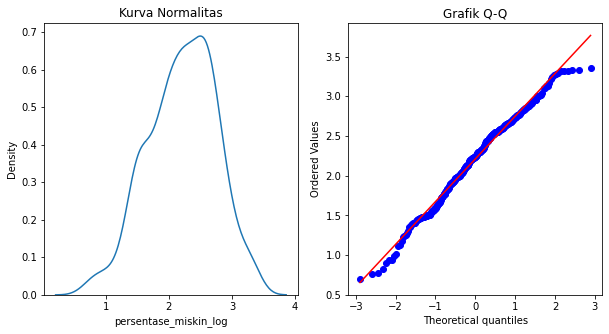

In [59]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['persentase_miskin_log'])
plt.subplot(1,2,2)
stats.probplot(df['persentase_miskin_log'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

**Indeks Pembangunan Manusia**

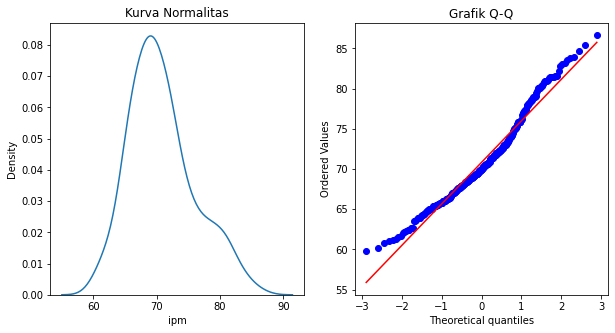

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Kurva Normalitas')
sns.kdeplot(df['ipm'])
plt.subplot(1,2,2)
stats.probplot(df['ipm'].dropna(),plot=py)
plt.title('Grafik Q-Q')
plt.show()

Dari **Grafik Q-Q** dapat dilihat bahwa data yang kami miliki dan residualnya, memiliki distribusi yang normal.

Namun, dari **Kurva Normalitas** dapat dilihat bahwa data dan residual yang kami miliki cenderung banyak kekiri (Slope to the right / Positive Skewness )

### 4. Uji Linearitas

In [49]:
df1= df[['persentase_miskin_log', 'tingkat_pengangguran_log', 'ipm']]
df2= df[['persentase_miskin_log', 'tingkat_pengangguran_log', 'jumlah_penduduk']]

**Persamaan 1**

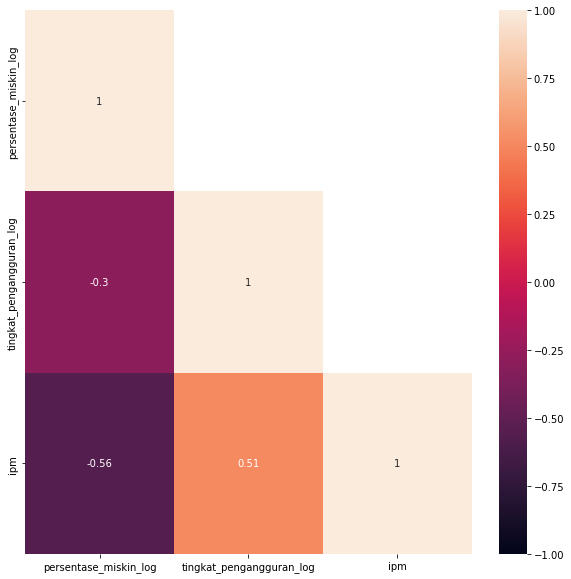

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True,vmin=-1, vmax=1, mask=np.triu(df1.corr(), k=1))
plt.show()

**Persamaan 2**

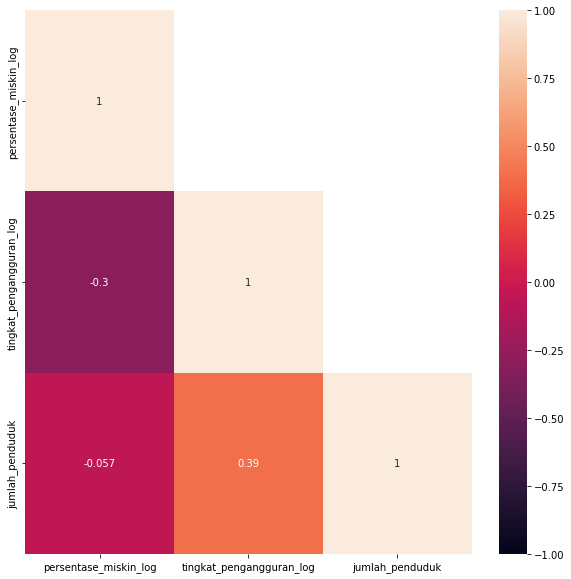

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr(),annot=True,vmin=-1, vmax=1,mask=np.triu(df2.corr(),k=1))
plt.show()

# Kalkulasi Error pada Model

In [52]:
test_df['persentase_miskin_pred'] = model_1.predict(data = test_df)
test_df['tingkat_pengangguran_pred'] = model_2.predict(data = test_df)

In [53]:
mse_model_train = mean_squared_error(train_df['persentase_miskin_log'], df['persentase_miskin_pred'].dropna())
rmse_model_train = np.sqrt(mse_model_train)

mse_model_test = mean_squared_error(test_df['persentase_miskin_log'], test_df['persentase_miskin_pred'].dropna())
rmse_model_test = np.sqrt(mse_model_test)

print("MSE of Equation 1 (Train) :",mse_model_train)
print("RMSE of Equation 1 (Train):", rmse_model_train)

print("MSE of Equation 1 (Test) :",mse_model_test)
print("RMSE of Equation 1 (Test):", rmse_model_test)

MSE of Equation 1 (Train) : 0.22562430699409425
RMSE of Equation 1 (Train): 0.47499927051953905
MSE of Equation 1 (Test) : 0.14967585204628442
RMSE of Equation 1 (Test): 0.38687963508859496


In [54]:
mse_model_train = mean_squared_error(train_df['tingkat_pengangguran_log'], df['tingkat_pengangguran_pred'].dropna())
rmse_model_train = np.sqrt(mse_model_train)

mse_model_test = mean_squared_error(test_df['tingkat_pengangguran_log'], test_df['tingkat_pengangguran_pred'].dropna())
rmse_model_test = np.sqrt(mse_model_test)

print("MSE of Equation 2 (Train) :", mse_model_train)
print("RMSE of Equation 2 (Train) :", rmse_model_train)

print("MSE of Equation 1 (Test) :", mse_model_test)
print("RMSE of Equation 1 (Test):", rmse_model_test)

MSE of Equation 2 (Train) : 0.24032078748596683
RMSE of Equation 2 (Train) : 0.4902252415838732
MSE of Equation 1 (Test) : 0.179516022853965
RMSE of Equation 1 (Test): 0.4236933122601359


# Kecocokan Model

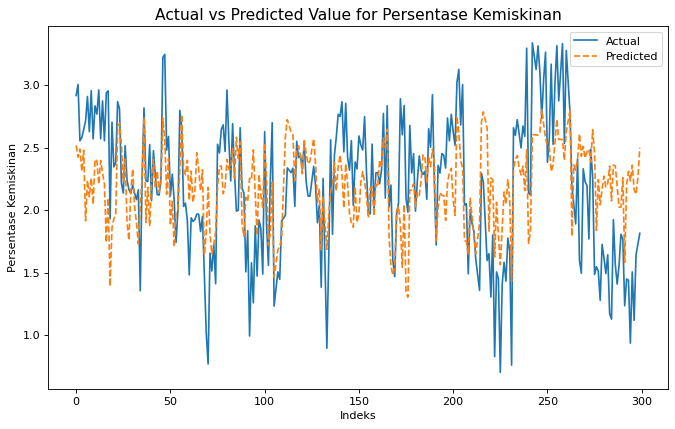

In [55]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(train_df["persentase_miskin_log"],label="Actual")
plt.plot(df['persentase_miskin_pred'],label="Predicted",linestyle="--")
plt.title('Actual vs Predicted Value for Persentase Kemiskinan',size=14)
plt.xlabel('Indeks') 
plt.ylabel('Persentase Kemiskinan')
plt.legend()
plt.show()

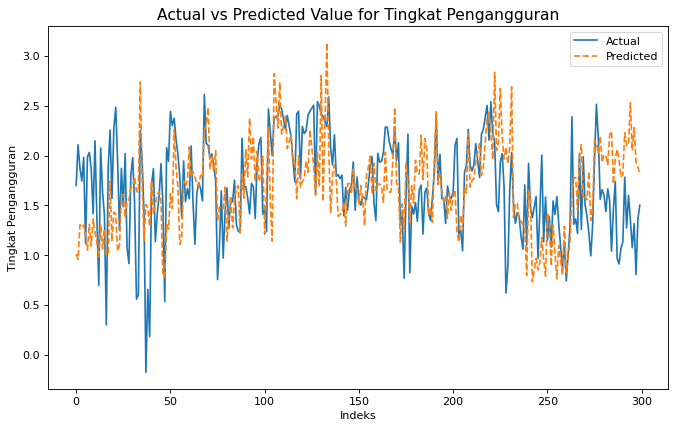

In [56]:
plt.figure(figsize=(10, 6), dpi=80)
plt.plot(train_df["tingkat_pengangguran_log"],label="Actual")
plt.plot(df['tingkat_pengangguran_pred'],label="Predicted",linestyle="--")
plt.title('Actual vs Predicted Value for Tingkat Pengangguran',size=14)
plt.xlabel('Indeks') 
plt.ylabel('Tingkat Pengangguran')
plt.legend()
plt.show()